In [1]:
import numpy as np 

import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/project/amp/akwilson/testdata/ENTER/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")
de = xr.open_mfdataset("/project/amp/brianpm/TemperatureExtremes/Regridded/f.e13.FAMIPC5CN.ne30_ne30.beta17.t3.cam.h1.TREFMXAV.19650101-20051231.regrid.nc")
tmax = ds['tmax'].compute()
tmax1 = de['TREFMXAV'].compute()

MemoryError: 

In [ ]:
tmax_avg_by_month = tmax.groupby('time.month').mean(dim='time')
tmax_avg_by_month1 = tmax1.groupby('time.month').mean(dim='time')

In [ ]:
month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
lons, lats = np.meshgrid(ds['lon'], ds['lat'])  # this creates arrays of longitude and latitude

month_names = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
lons, lats = np.meshgrid(de['lon'], de['lat'])  # this creates arrays of longitude and latitude


In [ ]:
fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=4, subplot_kw={"projection":ccrs.Robinson()}, constrained_layout=True)

for i, a in enumerate(ax.ravel()):
    im = a.contourf(lons, lats, tmax_avg_by_month.isel(month=i), transform=ccrs.PlateCarree(), cmap='inferno_r')
    a.coastlines()
    cbar = fig.colorbar(im, ax=a, shrink=0.5, orientation='horizontal')
    # reduce ticks:
    clr_ticks = cbar.get_ticks()
    cbar.set_ticks(clr_ticks[::2])  
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    a.set_global()
    a.set_title(month_names[i], loc='left', fontsize=10)
    
    
    

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_solids', '_boundaries', '_central_N', '_config_axes', '_edges', '_extend_lower', '_extend_upper', '_extended_N', '_find_range', '_get_extension_lengths', '_get_ticker_locator_formatter', '_inside', '_label', '_labelkw', '_locate', '_manual_tick_data_values', '_mesh', '_outline', '_patch_ax', '_process_values', '_proportional_y', '_reset_locator_formatter_scale', '_set_label', '_slice_dict', '_ticker', '_uniform_y', '_use_auto_colorbar_locator', '_values', '_y', 'add_lines', 'alpha', 'ax', 'boundaries', 'cmap', 'config_axis', 'dividers', 'draw_all', 'drawedges', 'extend', 'extendfrac', 'extendrect', 'filled', 'formatter', 'get_clim', 'get_cma

Text(0.0, 1.0, 'JAN')

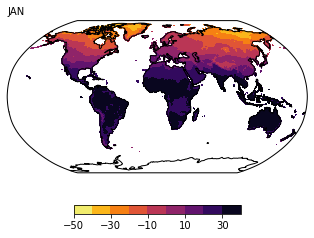

In [93]:
fig0, ax0 = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})

im0 = ax0.contourf(lons, lats, tmax_avg_by_month.isel(month=1), transform=ccrs.PlateCarree(), cmap='inferno_r')
ax0.coastlines()
cbar0 = fig0.colorbar(im0, ax=ax0, shrink=0.5, orientation='horizontal')
print(dir(cbar0))
# reduce ticks:
clr_ticks = cbar0.get_ticks()
print(clr_ticks)
cbar0.set_ticks(clr_ticks[::2])  
# # make the map global rather than have it zoom in to
# # the extents of any plotted data
ax0.set_global()
ax0.set_title(month_names[0], loc='left', fontsize=10)

In [94]:
cmich = (43. + 35/60,  360. - (84. + 46/60))
atlanta = (33. + 45/60,  360. - (84. + 23/60))

In [100]:
atlanta_tmax = tmax.sel(lat=atlanta[0], lon=atlanta[1], method='nearest')

In [102]:
time = ds['time']
augatl = atlanta_tmax[(time.dt.month == 8)]

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

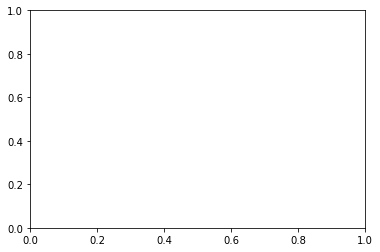

In [105]:
augatl_f.plot()


In [103]:
def degC_to_degF(C):
    return C * (9./5.) + 32.

In [104]:
augatl_f = degC_to_degF(augatl)

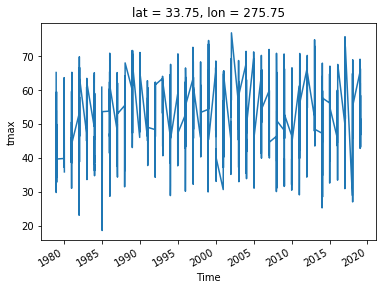

In [80]:
augatl_f.plot()

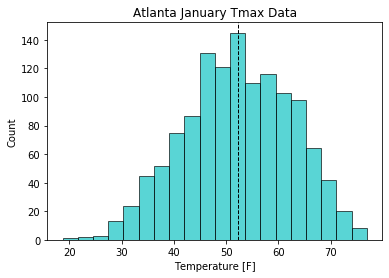

In [82]:

result = plt.hist(augatl_f, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(augatl_f.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Atlanta January Tmax Data')
plt.xlabel('Temperature [F]')
plt.ylabel('Count')
plt.show()
#fig.savefig("/project/amp/akwilson/testdata/atlantajan_figure_001.png")

